# **Template Matching**
- **it is the simplest form of object detection.**
- **It simply scans a larger image for a provided template by sliding the template target image across the larger image.**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('../Image_processing/Resources/DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

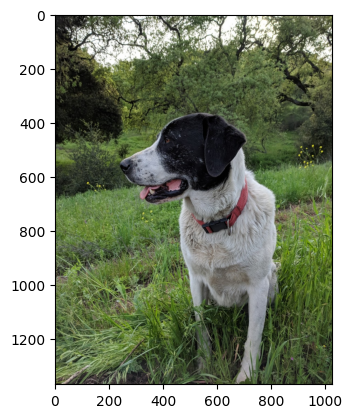

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('../Image_processing/Resources/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

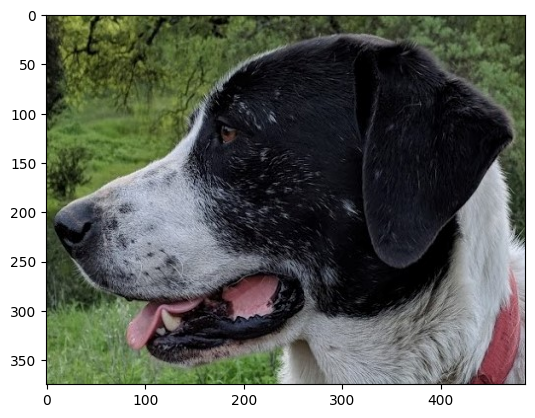

In [5]:
plt.imshow(face)

In [6]:
full.shape, face.shape

((1367, 1025, 3), (375, 486, 3))

In [7]:
str_func = 'sum'
original_func = eval(str_func)
original_func([10, 20, 30])

60

In [8]:
list_of_methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [9]:
# How this functions works
sample_met = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, sample_met)

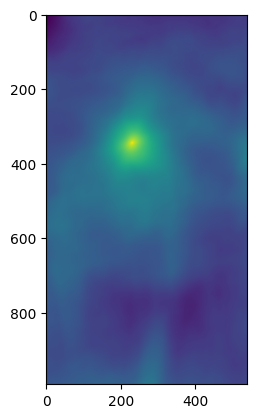

In [10]:
# Coorelation at specific point/ maximum values are matching at brightest point
# Now we will find the maximum & minimum value of this image to identify the location, from where we will start to draw rectangle
plt.imshow(res) 

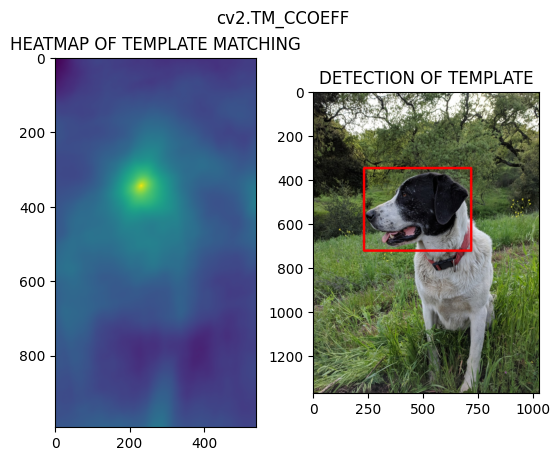

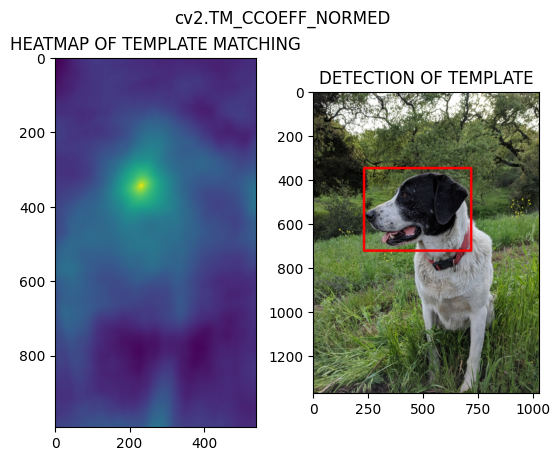

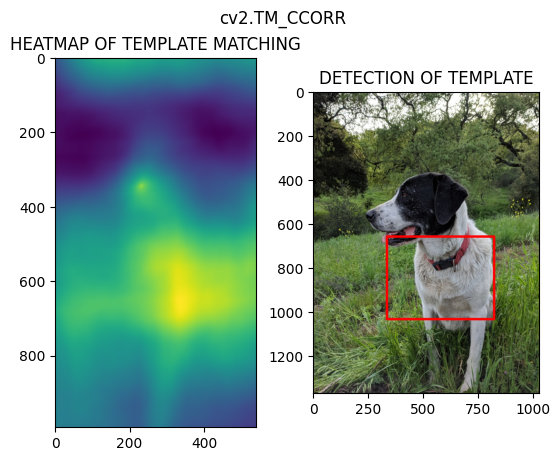

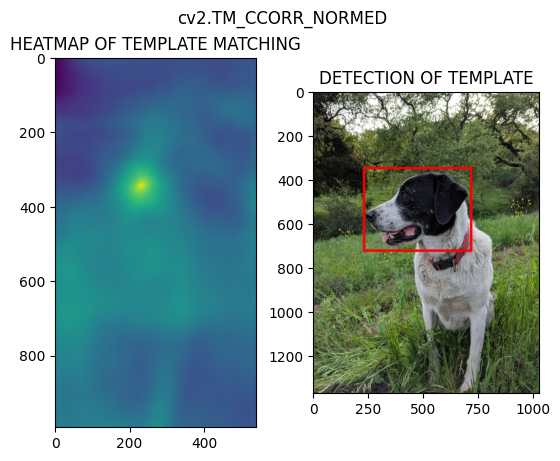

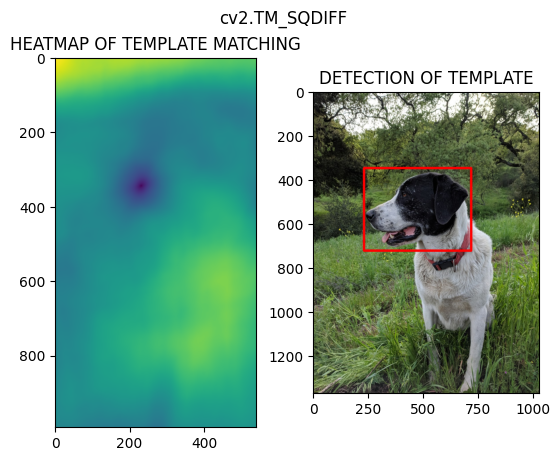

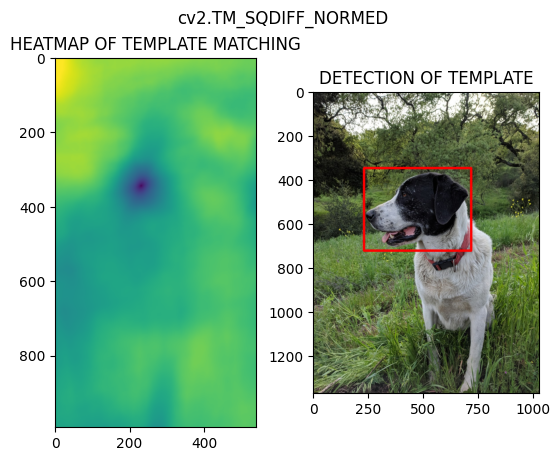

In [11]:
for method in list_of_methods:
    full_copy = full.copy()
    met = eval(method)

    # Template matching
    result = cv2.matchTemplate(full_copy, face, met)
    min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(result)

    if met in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x, y)
    else:
        top_left = max_loc

    height, width, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)

    plt.subplot(121)
    plt.imshow(result)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')

    # Used method...
    plt.suptitle(method)

    plt.show()
    print('\n')
    print('\n')

---

# **Corner Detection**
- **A junction of two edges, where an edge is a sudden change in image brightness**

### **1.** **Harris Corner Detection**
- **The basic intuation is that corners can be detected by looking for significant change in all directions**

$$
f(\Delta x, \Delta y) = \sum_{(x_k, y_k) \in W} \left( I(x_k, y_k) - I(x_k + \Delta x, y_k + \Delta y) \right)^2
$$

![Edge_detection](edge-detection.png)

- **[1st image] : Flat regions will have no change in all directions.**
- **[2nd image] :Edges won't have major change along the direction of the edge**
- **[3rd image] : By changing the direction in 3rd image will leads to significant change in appearence**

In [12]:
flat_chess = cv2.imread('../Image_processing/Resources/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

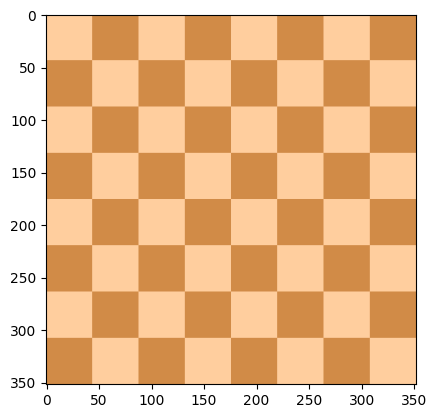

In [13]:
plt.imshow(flat_chess)

In [14]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

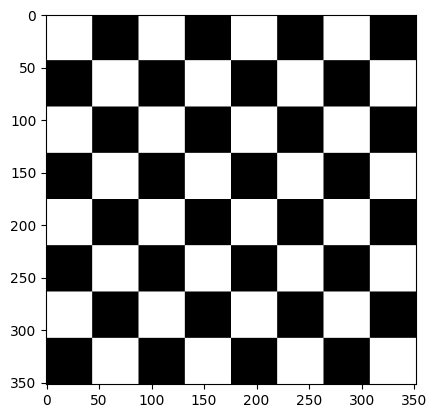

In [15]:
plt.imshow(gray_flat_chess, cmap='gray')

In [16]:
real_chess = cv2.imread('../Image_processing/Resources/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB) 

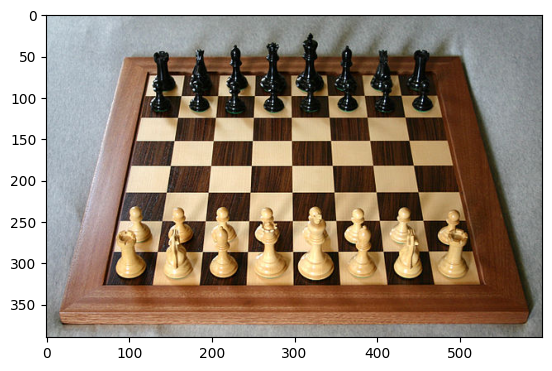

In [17]:
plt.imshow(real_chess)

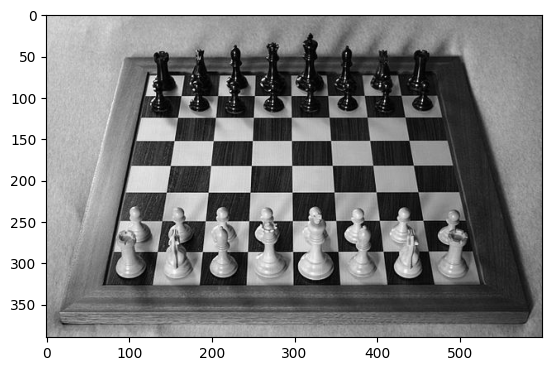

In [18]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [19]:
gray = np.float32(gray_flat_chess)
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]],
      shape=(352, 352), dtype=float32)

In [20]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [21]:
dst = cv2.dilate(dst, None) # A morthological operator

In [22]:
flat_chess[dst > 0.01 * dst.max()] = [255, 0, 0] # RGB

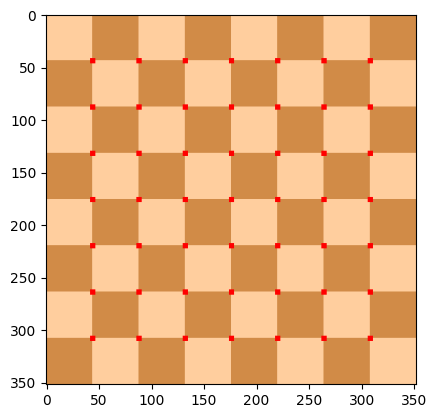

In [23]:
plt.imshow(flat_chess)

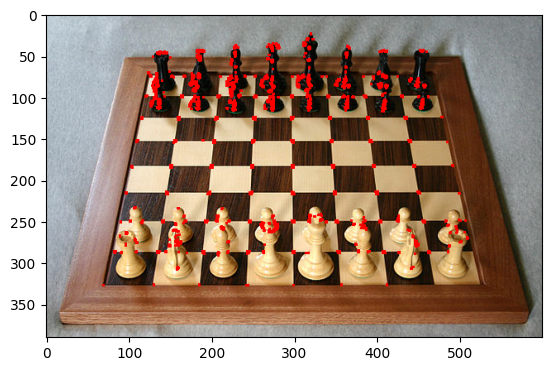

In [24]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst > 0.01 * dst.max()] = [255, 0, 0]
plt.imshow(real_chess)

---

## **2.** **Shi-Tomasi Corner-Detection**

In [25]:
real_chess = cv2.imread("../Image_processing/Resources/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread("../Image_processing/Resources/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [26]:
corners = cv2.goodFeaturesToTrack(
    gray_flat_chess, 
    5, # maximum number of corner we want
    0.01,
    10
)

In [27]:
corners = np.int64(corners)

In [28]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x, y), 3, (255, 0, 0), -1)

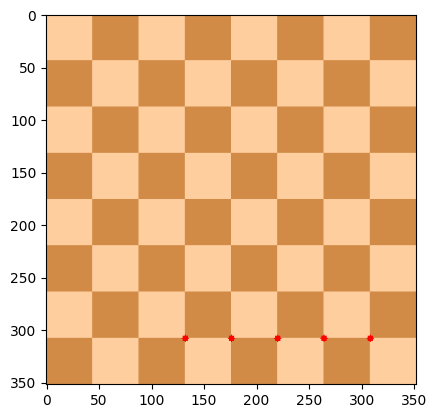

In [29]:
plt.imshow(flat_chess)

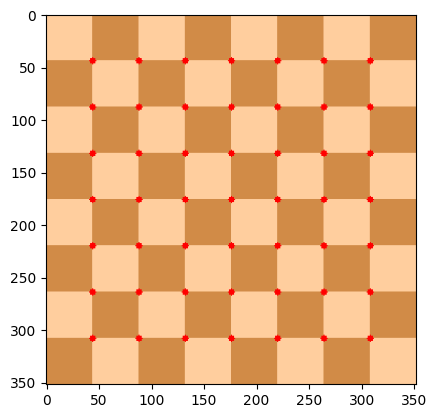

In [30]:
corners = cv2.goodFeaturesToTrack(
    gray_flat_chess, 
    64, # maximum number of corner we want
    0.01,
    10
)

corners = np.int64(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x, y), 3, (255, 0, 0), -1)

plt.imshow(flat_chess)

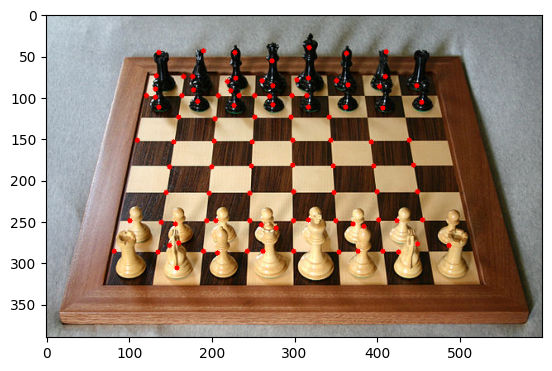

In [35]:
corners = cv2.goodFeaturesToTrack(
    gray_real_chess, 
    100, # maximum number of corner we want
    0.01,
    10
)

corners = np.int64(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x, y), 3, (255, 0, 0), -1)

plt.imshow(real_chess)